In [1]:
import sys

In [2]:
print(sys.path)

['G:\\Doby\\ViT\\train', 'C:\\Users\\user\\anaconda3\\python310.zip', 'C:\\Users\\user\\anaconda3\\DLLs', 'C:\\Users\\user\\anaconda3\\lib', 'C:\\Users\\user\\anaconda3', '', 'C:\\Users\\user\\anaconda3\\lib\\site-packages', 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\Pythonwin']


In [3]:
sys.path.append('G:\\Doby\\ViT')

In [12]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import transforms
from PIL import Image
from torchinfo import summary
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from models.ViT import ViT

In [13]:
vit = torch.load('vit_mnist_epoch4_batch16.pt')

In [15]:
summary(vit, (1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
ViT                                      [1, 10]                   --
├─InputEmbedding: 1-1                    [1, 50, 10]               510
│    └─PatchEmbedding: 2-1               [1, 49, 10]               --
│    │    └─Flatten: 3-1                 [1, 16]                   --
│    │    └─Flatten: 3-2                 [1, 16]                   --
│    │    └─Flatten: 3-3                 [1, 16]                   --
│    │    └─Flatten: 3-4                 [1, 16]                   --
│    │    └─Flatten: 3-5                 [1, 16]                   --
│    │    └─Flatten: 3-6                 [1, 16]                   --
│    │    └─Flatten: 3-7                 [1, 16]                   --
│    │    └─Flatten: 3-8                 [1, 16]                   --
│    │    └─Flatten: 3-9                 [1, 16]                   --
│    │    └─Flatten: 3-10                [1, 16]                   --
│    │    └─Fl

In [16]:
test_data = datasets.MNIST(root='./mnist_test',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())

In [17]:
len(test_data)

10000

In [18]:
test_loader = DataLoader(dataset=test_data,
                         batch_size=1,
                         shuffle=True)

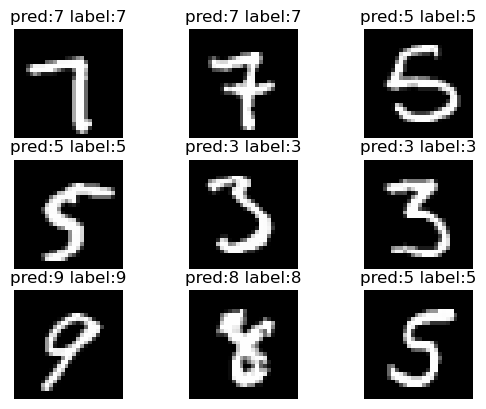

In [35]:
fig = plt.figure()
rows = 3
cols = 3

test_num = 9
with torch.no_grad():
    for i, (batch, target) in enumerate(test_loader, 1):
        output = vit(batch)
        output = output.squeeze().argmax()
        pred = output.item()
        target = target.squeeze().item()

        ax = fig.add_subplot(rows, cols, i)
        ax.imshow(batch.squeeze().numpy(), cmap='gray')
        ax.set_title(f'pred:{pred} label:{target}')
        ax.axis('off')

        '''
        plt.title(f'predict = {pred}, target = {target}')
        plt.imshow(batch.squeeze().numpy(), cmap='gray')
        plt.axis('off')
        plt.show()
        '''
        if i == test_num:
            break
plt.show()